Image size: (32, 32, 3)


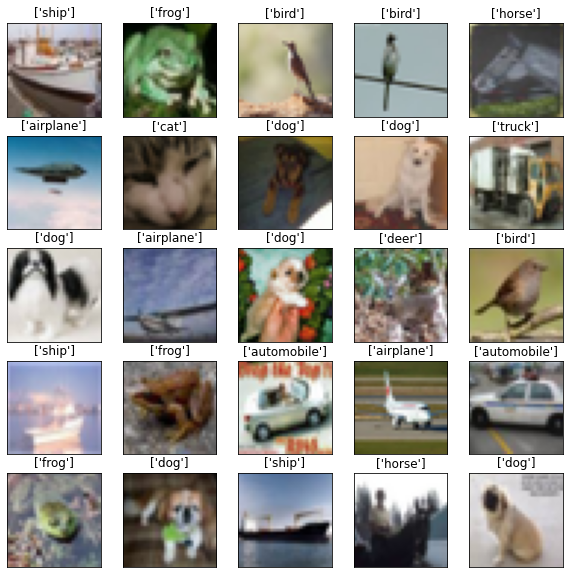

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10

(x_train, t_train), (x_test, t_test) = cifar10.load_data()
print("Image size:", x_train[0].shape)

cifar10_labels = np.array(["airplane", "automobile", "bird", "cat", "deer",
                           "dog", "frog", "horse", "ship", "truck"])

n_image = 25
rand_idx = np.random.randint(0, len(x_train), n_image)

plt.figure(figsize=(10,10))  # 画像の表示サイズ
for i in range(n_image):
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_train[rand_idx[i]])
    label = cifar10_labels[t_train[rand_idx[i]]]
    plt.title(label)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)  # ラベルとメモリを非表示に

plt.show()

In [3]:
from keras.utils import np_utils

batch_size = 32
epochs = 20
n_class = 10  # 10のクラスに分類

# one-hot表現に変換
t_train = np_utils.to_categorical(t_train)
t_test = np_utils.to_categorical(t_test)
print(t_train[:10])

x_train = x_train / 255  # 0から1の範囲に収める
x_test = x_test / 255

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))  # ゼロパディング、バッチサイズ以外の画像の形状を指定
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # 一次元の配列に変換
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))  # ドロップアウト
model.add(Dense(n_class))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 15, 15, 64)        0

In [5]:
history = model.fit(x_train, t_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_test, t_test))

Epoch 1/20
1563/1563 [==============================] - 53s 6ms/step - loss: 1.7595 - accuracy: 0.3432 - val_loss: 1.2277 - val_accuracy: 0.5574
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1836 - accuracy: 0.5776 - val_loss: 0.9884 - val_accuracy: 0.6482
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9791 - accuracy: 0.6576 - val_loss: 0.8590 - val_accuracy: 0.6978
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8374 - accuracy: 0.7098 - val_loss: 0.7847 - val_accuracy: 0.7300
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7492 - accuracy: 0.7366 - val_loss: 0.7818 - val_accuracy: 0.7295
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6970 - accuracy: 0.7575 - val_loss: 0.7466 - val_accuracy: 0.7441
Epoch 7/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6320 - accuracy: 0.7782 - val_loss: 0.7321 - val_accuracy

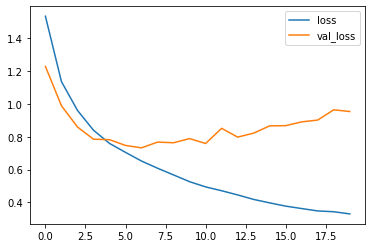

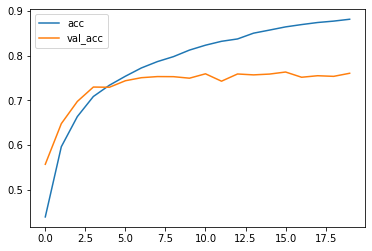

In [6]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']  # 訓練用データの誤差
train_acc = history.history['accuracy']  # 訓練用データの精度
val_loss = history.history['val_loss']  # 検証用データの誤差
val_acc = history.history['val_accuracy']  # 検証用データの精度

plt.plot(np.arange(len(train_loss)), train_loss, label='loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='val_loss')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label='acc')
plt.plot(np.arange(len(val_acc)), val_acc, label='val_acc')
plt.legend()
plt.show()

In [10]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.9530 - accuracy: 0.7608
0.9530400633811951 0.7608000040054321


# test2

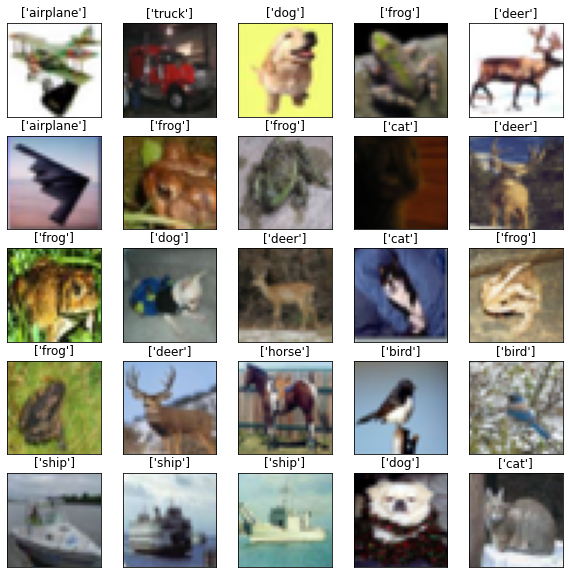

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10

(x_train, t_train), (x_test, t_test) = cifar10.load_data()

cifar10_labels = np.array(["airplane", "automobile", "bird", "cat", "deer",
                           "dog", "frog", "horse", "ship", "truck"])

rand_img = np.random.randint(0, len(x_train), 25)

plt.figure(figsize=(10,10))

for i in range(25):
  cifar_img = plt.subplot(5,5, i+1)
  plt.imshow(x_train[rand_img[i]])
  label = cifar10_labels[t_train[rand_img[i]]]
  plt.title(label)
  plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
  
plt.show()

In [ ]:
from keras.utils import np_utils

t_train = np_utils.to_categorical(t_train)
t_test = np_utils.to_categorical(t_test)
print(t_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))  # ゼロパディング、バッチサイズ以外の画像の形状を指定
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # 一次元の配列に変換
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))  # ドロップアウト
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_7 (Activation)    (None, 15, 15, 64)       

In [ ]:
x_train = x_train / 255  # 0から1の範囲に収める
x_test = x_test / 255

history = model.fit(x_train, t_train, epochs=10, batch_size=32,
                    validation_data=(x_test, t_test))

Epoch 1/10
1064/1563 [===================>..........] - ETA: 1:14 - loss: 1.8619 - accuracy: 0.3073

KeyboardInterrupt: ignored

In [ ]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

313/313 [==============================] - 12s 36ms/step - loss: 1.3225 - accuracy: 0.5279
1.3224859237670898 0.527899980545044


In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']  # 訓練用データの誤差
train_acc = history.history['accuracy']  # 訓練用データの精度
val_loss = history.history['val_loss']  # 検証用データの誤差
val_acc = history.history['val_accuracy']  # 検証用データの精度

plt.plot(np.arange(len(train_loss)), train_loss, label='loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='val_loss')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label='acc')
plt.plot(np.arange(len(val_acc)), val_acc, label='val_acc')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
n_image = 25
rand_idx = np.random.randint(0, len(x_test), n_image)

y_rand = model.predict(x_test[rand_idx])
predicted_class = np.argmax(y_rand, axis=1)

plt.figure(figsize=(10, 10)) 
for i in range(n_image):
    cifar_img=plt.subplot(5, 5, i+1)
    plt.imshow(x_test[rand_idx[i]])
    label = cifar10_labels[predicted_class[i]]
    plt.title(label)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
plt.show()